In [1]:
# EDA and data processing libraries
import pandas as pd
import numpy as np
# data visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
# datetime module
import datetime
# to ignore future warnings
import warnings
warnings.filterwarnings('ignore')
# to show our plots in the notebook
%matplotlib inline
# plot style from matplotlib
plt.style.use('seaborn')

In [2]:
# load and read file 
df = pd.read_csv('results.csv')
df.head()

date home_team away_team  home_score  away_score tournament     city  \
0  1872-11-30  Scotland   England           0           0   Friendly  Glasgow   
1  1873-03-08   England  Scotland           4           2   Friendly   London   
2  1874-03-07  Scotland   England           2           1   Friendly  Glasgow   
3  1875-03-06   England  Scotland           2           2   Friendly   London   
4  1876-03-04  Scotland   England           3           0   Friendly  Glasgow   

    country  neutral  
0  Scotland    False  
1   England    False  
2  Scotland    False  
3   England    False  
4  Scotland    False

In [3]:
# getting basic info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41586 entries, 0 to 41585
Data columns (total 9 columns):
date          41586 non-null object
home_team     41586 non-null object
away_team     41586 non-null object
home_score    41586 non-null int64
away_score    41586 non-null int64
tournament    41586 non-null object
city          41586 non-null object
country       41586 non-null object
neutral       41586 non-null bool
dtypes: bool(1), int64(2), object(6)
memory usage: 2.6+ MB


In [4]:
# getting EDA of the dataset
df.describe().T

count      mean       std  min  25%  50%  75%   max
home_score  41586.0  1.745756  1.753780  0.0  1.0  1.0  2.0  31.0
away_score  41586.0  1.187587  1.405323  0.0  0.0  1.0  2.0  21.0

In [5]:
# checking for null-values
df.isnull().any()

date          False
home_team     False
away_team     False
home_score    False
away_score    False
tournament    False
city          False
country       False
neutral       False
dtype: bool

In [6]:
# check datatypes of each columns
df.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

In [7]:
df.shape

(41586, 9)

In [8]:
# renaming columns
df.columns = ['Date', 'Home Team', 'Away Team','Home Score','Away Score','Tournament','City','Country','Neutral']

In [9]:
df.head(2)

Date Home Team Away Team  Home Score  Away Score Tournament     City  \
0  1872-11-30  Scotland   England           0           0   Friendly  Glasgow   
1  1873-03-08   England  Scotland           4           2   Friendly   London   

    Country  Neutral  
0  Scotland    False  
1   England    False

In [10]:
# convert date object to Timestamp uisng pd.to_datetime function
df['Date'] = pd.to_datetime(df['Date'],format='%Y-%m-%d')

In [11]:
# create a new column for Year of each match played 
# use the lambda funtion to grab the year from the datetime object
df['Year'] = df['Date'].apply(lambda time:time.year)

In [12]:
# create a new column for month of each match played
# # use the lambda funtion to grab the month from the datetime object
df['Month'] = df['Date'].apply(lambda time:time.month)

In [13]:
# create a new column for day of the week of each match played
# use the lambda funtion to grab the day of the week from the datetime object
df['DayofWeek'] = df['Date'].apply(lambda time:time.dayofweek)

In [14]:
df.dtypes

Date          datetime64[ns]
Home Team             object
Away Team             object
Home Score             int64
Away Score             int64
Tournament            object
City                  object
Country               object
Neutral                 bool
Year                   int64
Month                  int64
DayofWeek              int64
dtype: object

Notice how the Day of Week is an integer 0-6 and Month is an interger 1-12. Using the .map() with these dictionaries to map the actual string names to the day of the week and month:

In [15]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [16]:
mmap = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'}

In [17]:
df['Month'] = df['Month'].map(mmap)

In [18]:
df['DayofWeek'] = df['DayofWeek'].map(dmap)

In [19]:
df.tail()

Date      Home Team   Away Team  Home Score  Away Score  \
41581 2020-01-10       Barbados      Canada           1           4   
41582 2020-01-12         Kosovo      Sweden           0           1   
41583 2020-01-15         Canada     Iceland           0           1   
41584 2020-01-19    El Salvador     Iceland           0           1   
41585 2020-02-01  United States  Costa Rica           1           0   

      Tournament    City        Country  Neutral  Year Month DayofWeek  
41581   Friendly  Irvine  United States     True  2020   Jan       Fri  
41582   Friendly    Doha          Qatar     True  2020   Jan       Sun  
41583   Friendly  Irvine  United States     True  2020   Jan       Wed  
41584   Friendly  Carson  United States     True  2020   Jan       Sun  
41585   Friendly  Carson  United States    False  2020   Feb       Sat

In [20]:
df.shape

(41586, 12)

In [21]:
# create a function that shows the outcome of each match 
def outcome(df):
    '''
    A function that returns
    the outcome of each match
    
    Args:
        Df : A DataFrame
    '''
    if (df['Home Score'] > df['Away Score']):
        result = 'H'
    if (df['Away Score'] > df['Home Score']):
        result = 'A'
    if (df['Home Score'] == df['Away Score']):
        result = 'D'
    return result

In [22]:
# create a new column from the functionn created above
df['Outcome'] = df.apply(outcome, axis=1)

In [23]:
# create a function that shows the winner of each match
def winner(df):
    '''
    A function that returns
    the winner of each match
    
    Args:
        A DataFrame
    '''
    if (df['Home Score'] > df['Away Score']):
        result = df['Home Team']
    if (df['Away Score'] > df['Home Score']):
        result = df['Away Team']
    if (df['Home Score']==0) & (df['Away Score']==0):
        result = 'No Winner'
    # The away goal rule was used in the deciding the outcome of matches that didnt end in goaless draws
    if (df['Home Score']==df['Away Score']) & (df['Away Score']>0):
        result = df['Away Team']
    return result

In [24]:
# creating a new column for the Winner of each match
df['Winner'] = df.apply(winner, axis=1)

In [25]:
# create a function for the loser of each match
def loser(df):
    '''
    A function that returns
    the Loser of each match
    
    Args:
         A DataFrame
    '''
    if (df['Home Score'] > df['Away Score']):
        result = df['Away Team']
    if (df['Away Score'] > df['Home Score']):
        result = df['Home Team']
    if (df['Home Score']==0) & (df['Away Score']==0):
        result = 'No Loser'
    # The away goal rule was used in the deciding the outcome of matches that didnt end in goaless draws
    if (df['Home Score']==df['Away Score']) & (df['Away Score']>0):
        result = df['Home Team']
    return result

In [26]:
# create a new column for the loser of each match
df['Loser'] = df.apply(loser, axis=1)

In [27]:
df[df['Outcome'] =='D'].head(3)

Date         Home Team Away Team  Home Score  Away Score Tournament  \
0  1872-11-30          Scotland   England           0           0   Friendly   
3  1875-03-06           England  Scotland           2           2   Friendly   
28 1883-03-17  Northern Ireland     Wales           1           1   Friendly   

       City              Country  Neutral  Year Month DayofWeek Outcome  \
0   Glasgow             Scotland    False  1872   Nov       Sat       D   
3    London              England    False  1875   Mar       Sat       D   
28  Belfast  Republic of Ireland    False  1883   Mar       Sat       D   

       Winner             Loser  
0   No Winner          No Loser  
3    Scotland           England  
28      Wales  Northern Ireland

In [28]:
df['Total Goals'] = df['Home Score'] + df['Away Score']

In [29]:
df.tail()

Date      Home Team   Away Team  Home Score  Away Score  \
41581 2020-01-10       Barbados      Canada           1           4   
41582 2020-01-12         Kosovo      Sweden           0           1   
41583 2020-01-15         Canada     Iceland           0           1   
41584 2020-01-19    El Salvador     Iceland           0           1   
41585 2020-02-01  United States  Costa Rica           1           0   

      Tournament    City        Country  Neutral  Year Month DayofWeek  \
41581   Friendly  Irvine  United States     True  2020   Jan       Fri   
41582   Friendly    Doha          Qatar     True  2020   Jan       Sun   
41583   Friendly  Irvine  United States     True  2020   Jan       Wed   
41584   Friendly  Carson  United States     True  2020   Jan       Sun   
41585   Friendly  Carson  United States    False  2020   Feb       Sat   

      Outcome         Winner        Loser  Total Goals  
41581       A         Canada     Barbados            5  
41582       A         Sweden       Kosovo            1  
41583       A        Iceland       Canada            1  
41584       A        Iceland  El Salvador            1  
41585       H  United States   Costa Rica            1

In [30]:
df.shape

(41586, 16)

In [31]:
df.isnull().any()

Date           False
Home Team      False
Away Team      False
Home Score     False
Away Score     False
Tournament     False
City           False
Country        False
Neutral        False
Year           False
Month          False
DayofWeek      False
Outcome        False
Winner         False
Loser          False
Total Goals    False
dtype: bool

In [32]:
# create a new list containing all teams 
teams = []
for team in df['Home Team']:
    teams.append(team)
for team in df['Away Team']:
    teams.append(team)

In [33]:
# create a new dataframe from the list created above
teams = pd.DataFrame(teams)
teams.columns = ['Teams']

In [34]:
# creating a function to plot some countplot of some analysis
def Plot_a_countplot(df, col, title):
    """
    Create a count plot from a value count (first fifteen) on the column specified
    
    Args: 
        df= dataframe 
        col= name of column
        title = title desired
    
    """
    plt.figure(figsize=(10,10))
    data = df[col].value_counts().head(15)
    ax = sns.countplot(y=df[col],
                  order=data.index,
                  lw=1,
                  palette='inferno',
                  edgecolor='k'*df[col].nunique()
                  )
    for x,y in enumerate(data):
        ax.text(1.9,x,y,weight='bold',color='white',fontsize=12,bbox=dict(facecolor='black', alpha=0.7))
    plt.title(title,fontsize=16)

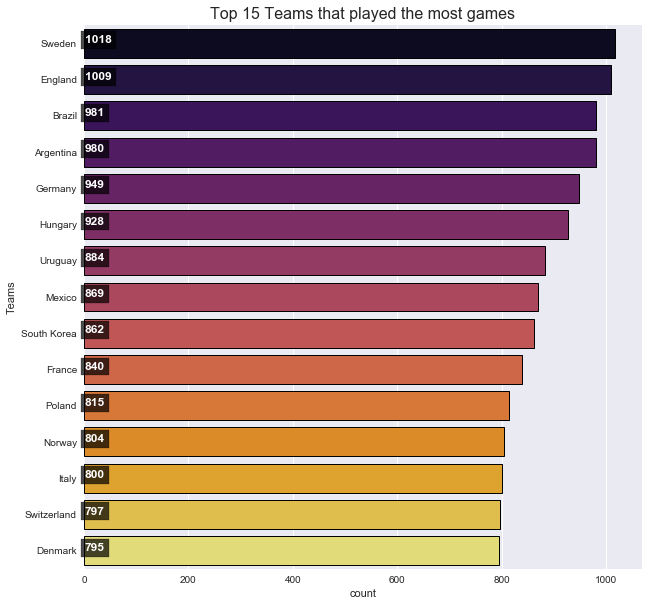

In [35]:
Plot_a_countplot(teams,'Teams', 'Top 15 Teams that played the most games')

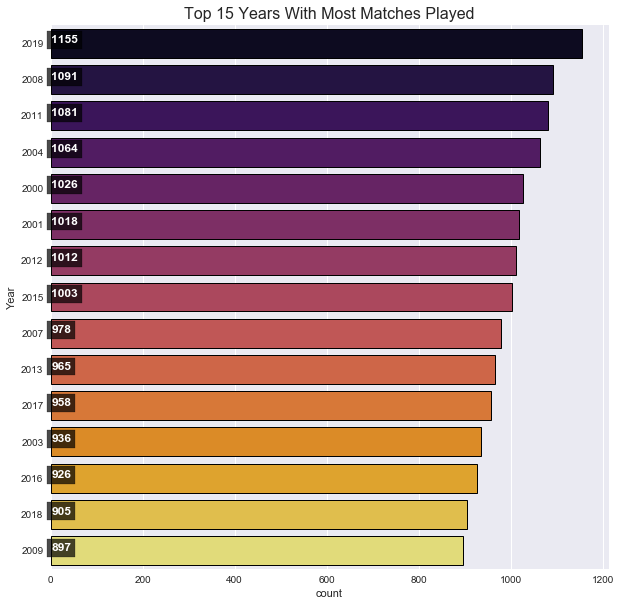

In [36]:
Plot_a_countplot(df, 'Year', 'Top 15 Years With Most Matches Played')

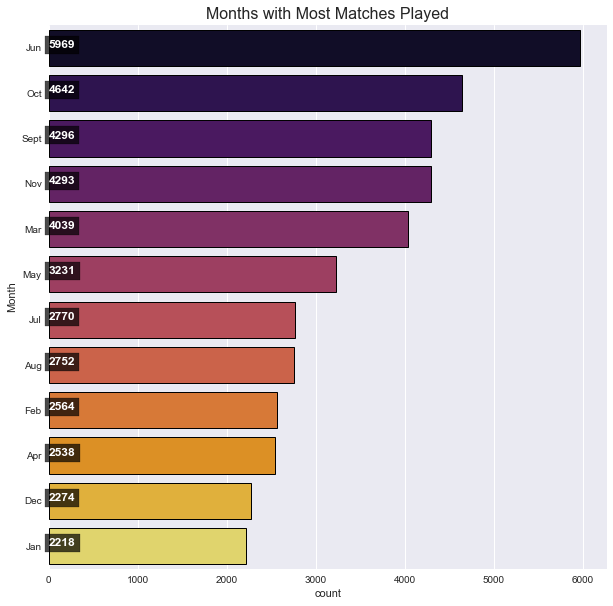

In [37]:
Plot_a_countplot(df,'Month','Months with Most Matches Played')

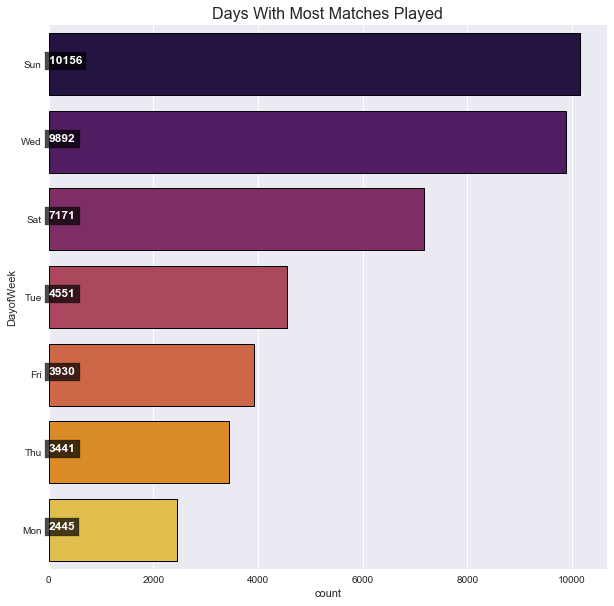

In [38]:
Plot_a_countplot(df,'DayofWeek','Days With Most Matches Played')

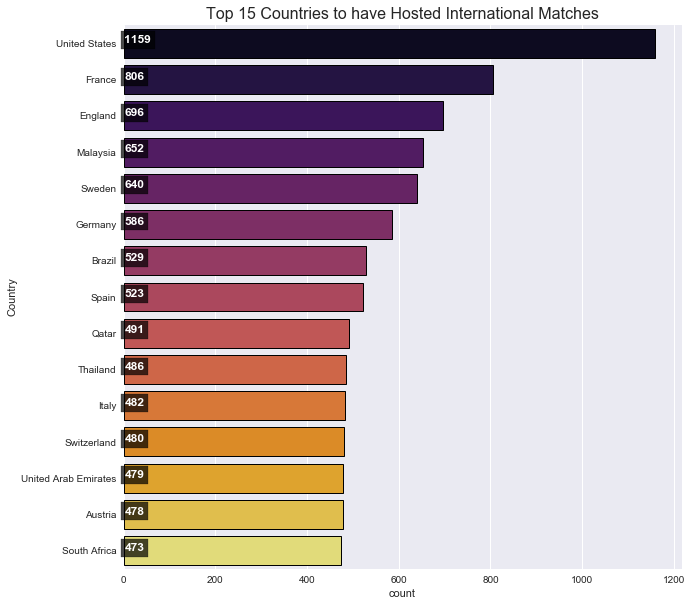

In [39]:
Plot_a_countplot(df,'Country','Top 15 Countries to have Hosted International Matches')

In [40]:
match_outcome = df['Outcome'].value_counts()
match_outcome

H    20234
A    11774
D     9578
Name: Outcome, dtype: int64

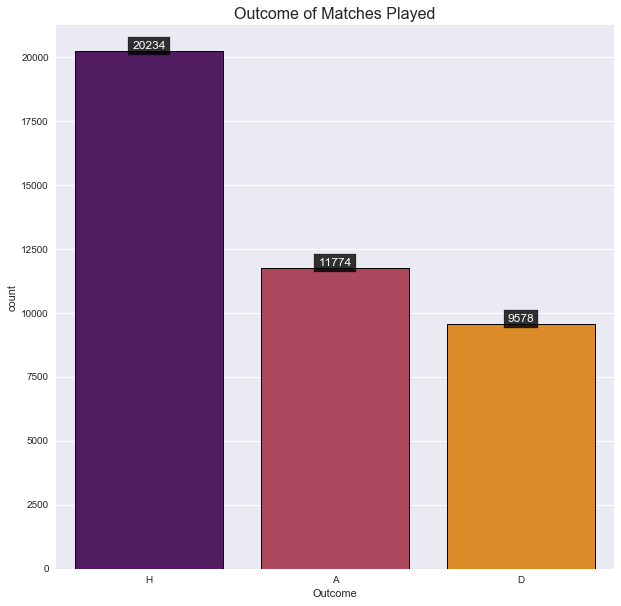

In [41]:
plt.figure(figsize=(10,10))
ax = sns.countplot(x=df['Outcome'],
                  order=match_outcome.index,
                  lw=1,
                  palette='inferno',
                  edgecolor='k'*df['Outcome'].nunique()
                  )
for p in ax.patches:
    ax.annotate(int(p.get_height()),(p.get_x() + p.get_width()/2.,p.get_height()),ha='center',
               va='bottom',bbox=dict(facecolor='black',alpha=0.8),color='white',fontsize=12)
plt.title('Outcome of Matches Played',fontsize=16)
plt.show()

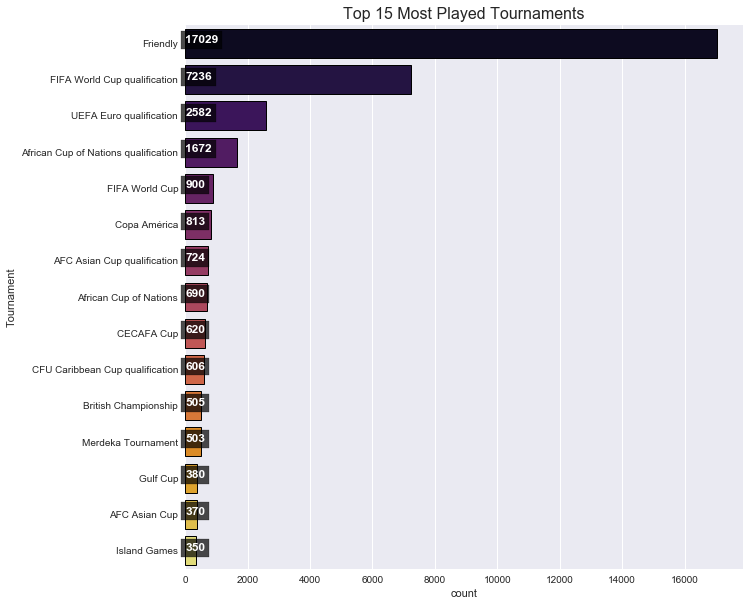

In [42]:
Plot_a_countplot(df,'Tournament','Top 15 Most Played Tournaments')

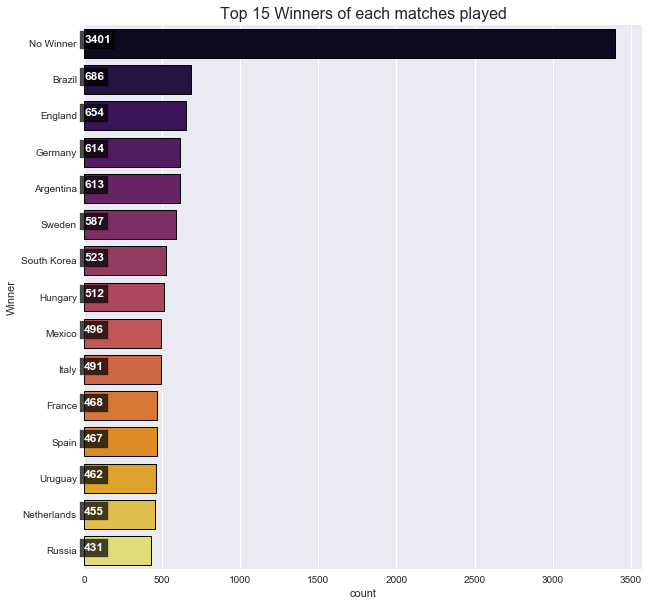

In [43]:
Plot_a_countplot(df,'Winner','Top 15 Winners of each matches played')

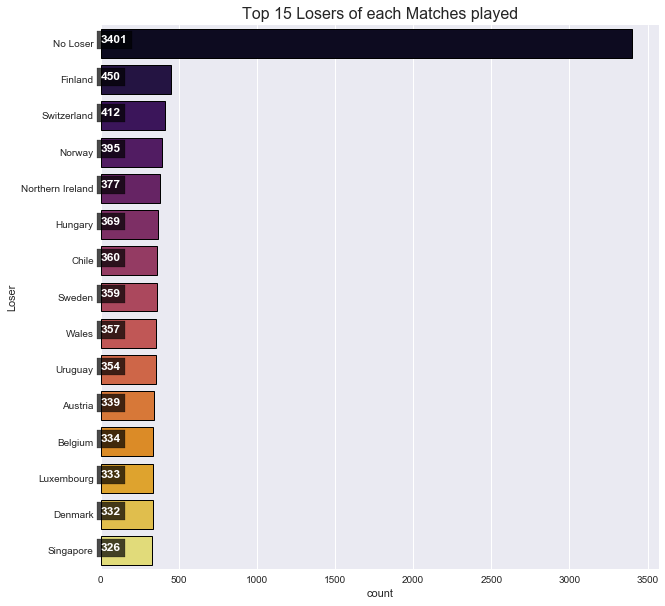

In [44]:
Plot_a_countplot(df,'Loser','Top 15 Losers of each Matches played')

In [45]:
goalsperyear = df.groupby('Year')['Total Goals'].sum().reset_index()

In [46]:
import plotly.express as px
import plotly.graph_objs

In [47]:
fig = px.line(goalsperyear,x='Year',y='Total Goals',title='Total Goals per Year in all Tournaments')
fig.show()

## An Analysis on matches played by Nigeria in all Tournaments from 1949 to 2019

In [48]:
Nigeria = df[(df['Home Team']=='Nigeria') | (df['Away Team']=='Nigeria')].reset_index()

In [49]:
Nigeria.drop('index',axis=1, inplace=True)

In [50]:
Nigeria.head()

Date     Home Team Away Team  Home Score  Away Score Tournament  \
0 1949-10-08  Sierra Leone   Nigeria           0           2   Friendly   
1 1950-05-28         Ghana   Nigeria           1           0   Friendly   
2 1951-10-20       Nigeria     Ghana           5           0   Friendly   
3 1953-10-11         Ghana   Nigeria           1           0   Friendly   
4 1954-10-30       Nigeria     Ghana           3           0   Friendly   

       City       Country  Neutral  Year Month DayofWeek Outcome   Winner  \
0  Freetown  Sierra Leone    False  1949   Oct       Sat       A  Nigeria   
1     Accra    Gold Coast    False  1950   May       Sun       H    Ghana   
2     Lagos       Nigeria    False  1951   Oct       Sat       H  Nigeria   
3     Accra    Gold Coast    False  1953   Oct       Sun       H    Ghana   
4     Lagos       Nigeria    False  1954   Oct       Sat       H  Nigeria   

          Loser  Total Goals  
0  Sierra Leone            2  
1       Nigeria            1  
2         Ghana            5  
3       Nigeria            1  
4         Ghana            3

In [51]:
Nigeria.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 16 columns):
Date           576 non-null datetime64[ns]
Home Team      576 non-null object
Away Team      576 non-null object
Home Score     576 non-null int64
Away Score     576 non-null int64
Tournament     576 non-null object
City           576 non-null object
Country        576 non-null object
Neutral        576 non-null bool
Year           576 non-null int64
Month          576 non-null object
DayofWeek      576 non-null object
Outcome        576 non-null object
Winner         576 non-null object
Loser          576 non-null object
Total Goals    576 non-null int64
dtypes: bool(1), datetime64[ns](1), int64(4), object(10)
memory usage: 68.2+ KB


In [52]:
Nigeria.describe().T

count         mean        std     min     25%     50%     75%  \
Home Score   576.0     1.562500   1.432389     0.0     1.0     1.0     2.0   
Away Score   576.0     0.928819   1.055076     0.0     0.0     1.0     1.0   
Year         576.0  1993.663194  17.830929  1949.0  1980.0  1997.0  2010.0   
Total Goals  576.0     2.491319   1.770265     0.0     1.0     2.0     4.0   

                max  
Home Score     10.0  
Away Score      6.0  
Year         2019.0  
Total Goals    11.0

In [53]:
Nigeria['Tournament'].value_counts()

Friendly                                      248
FIFA World Cup qualification                  102
African Cup of Nations                         93
African Cup of Nations qualification           75
FIFA World Cup                                 21
African Nations Championship                   19
Confederations Cup                              6
USA Cup                                         3
Korea Cup                                       3
African Nations Championship qualification      2
King Hassan II Tournament                       2
Lunar New Year Cup                              1
Nehru Cup                                       1
Name: Tournament, dtype: int64

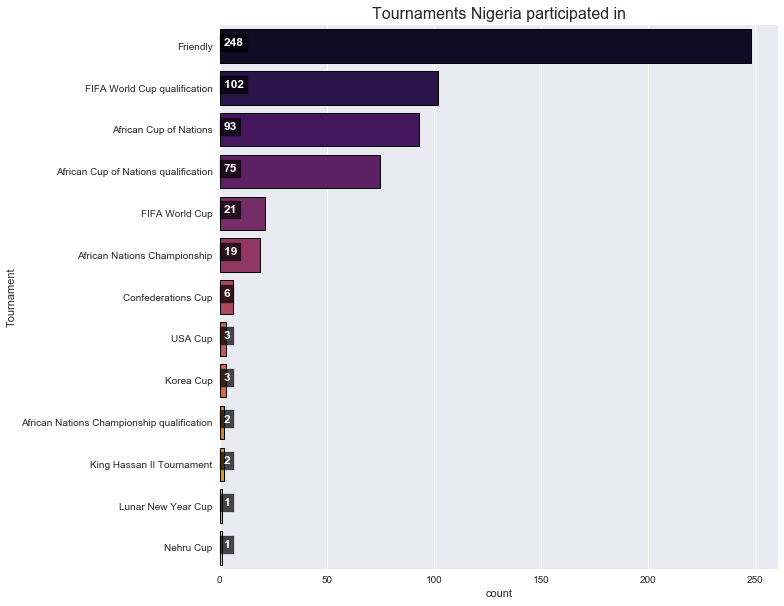

In [54]:
Plot_a_countplot(Nigeria,'Tournament','Tournaments Nigeria participated in')

In [55]:
# creating a function to plot some countplot of some analysis
def Plot_a_countplot2(df, col, title):
    """
    Create a count plot from a value count (first two) on the column specified
    
    Args: 
        df= dataframe 
        col= name of column
        title = title desired
    
    """
    plt.figure(figsize=(10,10))
    data = df[col].value_counts().head(2)
    ax = sns.countplot(y=df[col],
                  order=data.index,
                  lw=1,
                  palette='viridis',
                  edgecolor='k'*df[col].nunique()
                  )
    for x,y in enumerate(data):
        ax.text(1.9,x,y,weight='bold',color='white',fontsize=12,bbox=dict(facecolor='black', alpha=0.7))
    plt.title(title,fontsize=16)

In [56]:
Nigeria['Winner'].value_counts().head(2)

Nigeria      332
No Winner     66
Name: Winner, dtype: int64

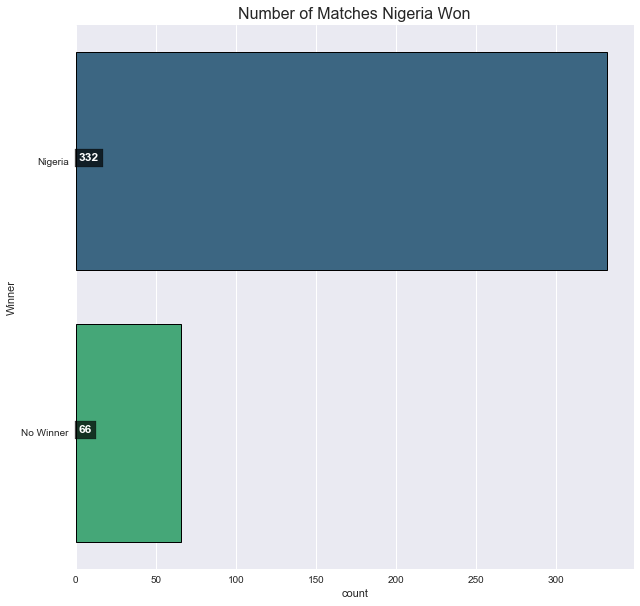

In [57]:
Plot_a_countplot2(Nigeria,'Winner','Number of Matches Nigeria Won')

In [58]:
Nigeria['Loser'].value_counts().head(2)

Nigeria     178
No Loser     66
Name: Loser, dtype: int64

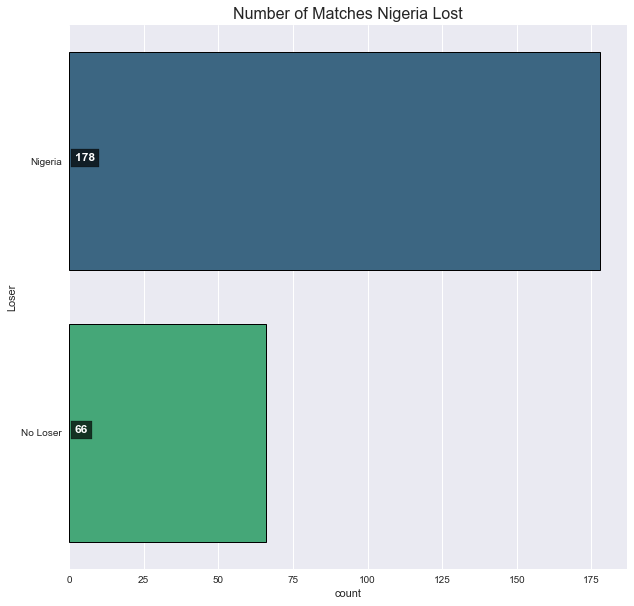

In [59]:
Plot_a_countplot2(Nigeria,'Loser','Number of Matches Nigeria Lost')

In [60]:
Nigeria[(Nigeria['Home Score']==0) & (Nigeria['Away Score']==0)].count()

Date           66
Home Team      66
Away Team      66
Home Score     66
Away Score     66
Tournament     66
City           66
Country        66
Neutral        66
Year           66
Month          66
DayofWeek      66
Outcome        66
Winner         66
Loser          66
Total Goals    66
dtype: int64

In [61]:
nigeria_goals = Nigeria.groupby('Year')['Total Goals'].sum().reset_index()

In [62]:
fig = px.line(nigeria_goals, x='Year',y='Total Goals', title='Total Goals scored by Nigeria in each Year')
fig.show()

## An Analysis on matches played in the African Cup of Nations Qualification Tournament from 1961 to 2019

**acnq = Africa Cup of Nations Qualification**

In [63]:
acnq = df[df['Tournament']=='African Cup of Nations qualification'].reset_index()

In [64]:
acnq.drop('index',axis=1,inplace=True)

In [65]:
acnq.head()

Date Home Team Away Team  Home Score  Away Score  \
0 1961-04-08   Nigeria     Ghana           0           0   
1 1961-04-30     Ghana   Nigeria           2           2   
2 1961-08-05     Kenya    Uganda           0           1   
3 1961-09-23    Uganda     Kenya           0           1   
4 1961-10-29    Uganda     Kenya           2           0   

                             Tournament     City  Country  Neutral  Year  \
0  African Cup of Nations qualification    Lagos  Nigeria    False  1961   
1  African Cup of Nations qualification    Accra    Ghana    False  1961   
2  African Cup of Nations qualification  Nairobi    Kenya    False  1961   
3  African Cup of Nations qualification  Kampala   Uganda    False  1961   
4  African Cup of Nations qualification  Kampala   Uganda    False  1961   

  Month DayofWeek Outcome     Winner     Loser  Total Goals  
0   Apr       Sat       D  No Winner  No Loser            0  
1   Apr       Sun       D    Nigeria     Ghana            4  
2   Aug       Sat       A     Uganda     Kenya            1  
3  Sept       Sat       A      Kenya    Uganda            1  
4   Oct       Sun       H     Uganda     Kenya            2

In [66]:
acnq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1672 entries, 0 to 1671
Data columns (total 16 columns):
Date           1672 non-null datetime64[ns]
Home Team      1672 non-null object
Away Team      1672 non-null object
Home Score     1672 non-null int64
Away Score     1672 non-null int64
Tournament     1672 non-null object
City           1672 non-null object
Country        1672 non-null object
Neutral        1672 non-null bool
Year           1672 non-null int64
Month          1672 non-null object
DayofWeek      1672 non-null object
Outcome        1672 non-null object
Winner         1672 non-null object
Loser          1672 non-null object
Total Goals    1672 non-null int64
dtypes: bool(1), datetime64[ns](1), int64(4), object(10)
memory usage: 197.7+ KB


In [67]:
acnq.describe().T

count         mean        std     min     25%     50%     75%  \
Home Score   1672.0     1.577751   1.432272     0.0     1.0     1.0     2.0   
Away Score   1672.0     0.803828   1.012092     0.0     0.0     1.0     1.0   
Year         1672.0  2000.130981  13.794645  1961.0  1992.0  2001.0  2012.0   
Total Goals  1672.0     2.381579   1.690002     0.0     1.0     2.0     3.0   

                max  
Home Score      9.0  
Away Score      9.0  
Year         2019.0  
Total Goals    10.0

In [68]:
teams = []
for team in acnq['Home Team']:
    teams.append(team)
for team in acnq['Away Team']:
    teams.append(team)
    
teams = pd.DataFrame(teams,columns=['Teams'])

In [69]:
teams['Teams'].value_counts()

DR Congo                    114
Ivory Coast                 102
Mali                         96
Congo                        95
Uganda                       94
Togo                         94
Senegal                      90
Guinea                       87
Algeria                      86
Zambia                       85
Mozambique                   83
Kenya                        83
Ethiopia                     79
Mauritius                    79
Cameroon                     79
Malawi                       78
Egypt                        75
Nigeria                      75
Angola                       75
Tunisia                      75
Zimbabwe                     75
Liberia                      75
Tanzania                     74
Sudan                        74
Morocco                      73
Ghana                        71
Sierra Leone                 67
Gabon                        66
Benin                        65
Burkina Faso                 64
Madagascar                   62
Niger   

Teams that has Participated in the Africa Cup of Nations Qualicfications


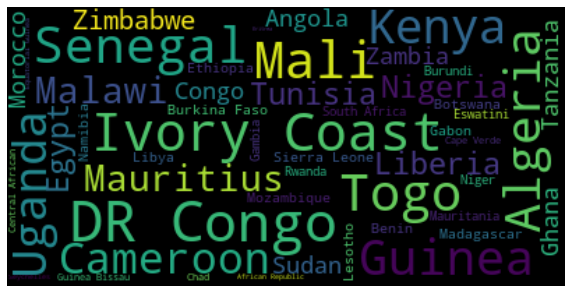

In [70]:
print('Teams that has Participated in the Africa Cup of Nations Qualicfications')
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(each) for each in teams['Teams'])


wordcloud = WordCloud(max_words=50,background_color='black',max_font_size=40).generate(text)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

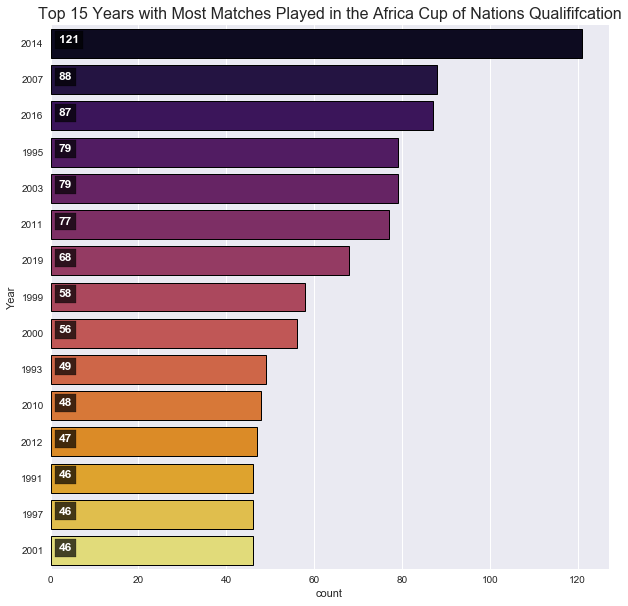

In [71]:
Plot_a_countplot(acnq,'Year','Top 15 Years with Most Matches Played in the Africa Cup of Nations Qualififcation')

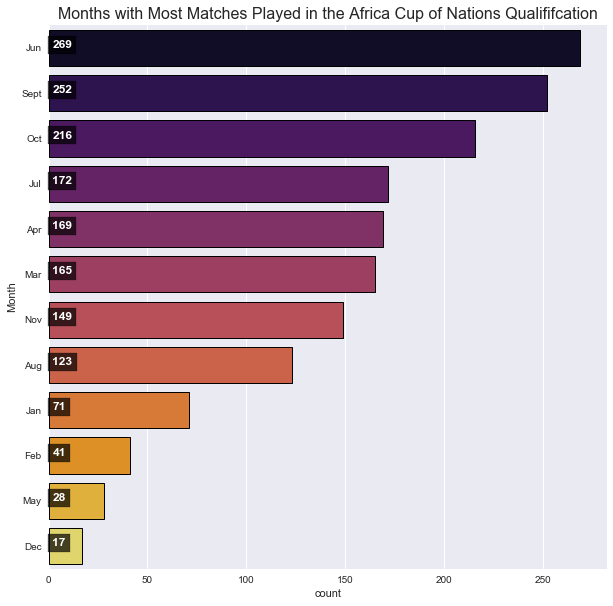

In [72]:
Plot_a_countplot(acnq,'Month','Months with Most Matches Played in the Africa Cup of Nations Qualififcation')

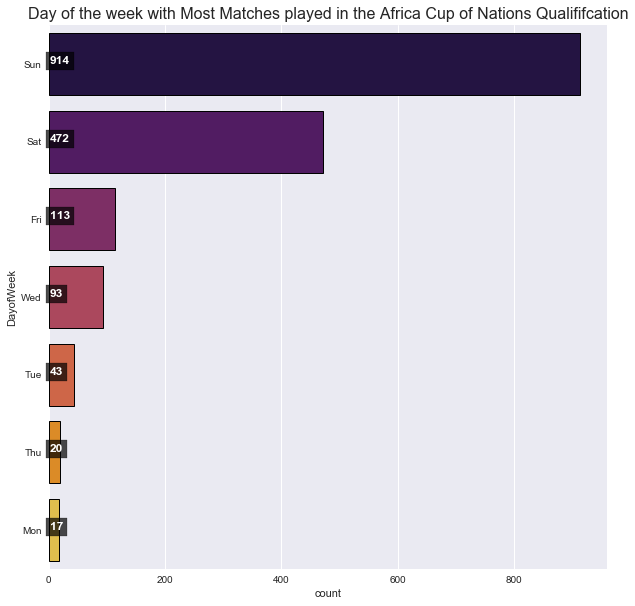

In [73]:
Plot_a_countplot(acnq,'DayofWeek','Day of the week with Most Matches played in the Africa Cup of Nations Qualififcation')

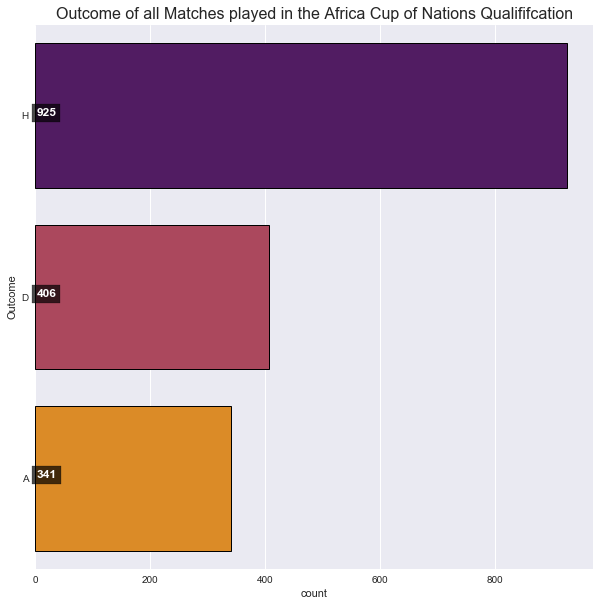

In [74]:
Plot_a_countplot(acnq,'Outcome','Outcome of all Matches played in the Africa Cup of Nations Qualififcation')

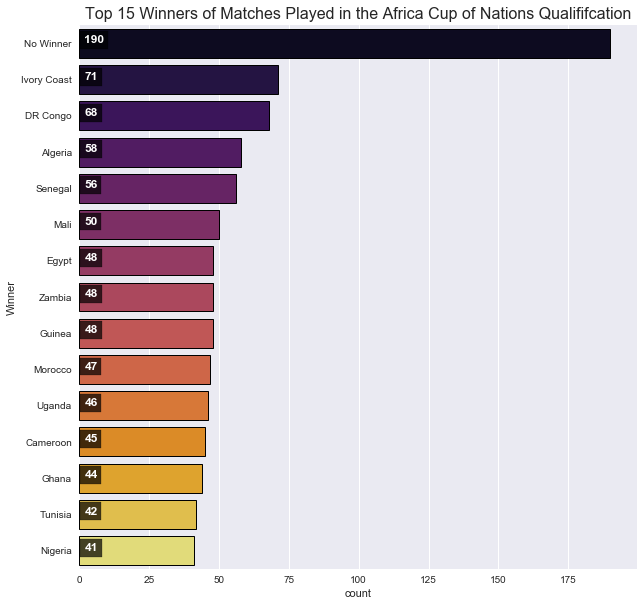

In [75]:
Plot_a_countplot(acnq,'Winner','Top 15 Winners of Matches Played in the Africa Cup of Nations Qualififcation')

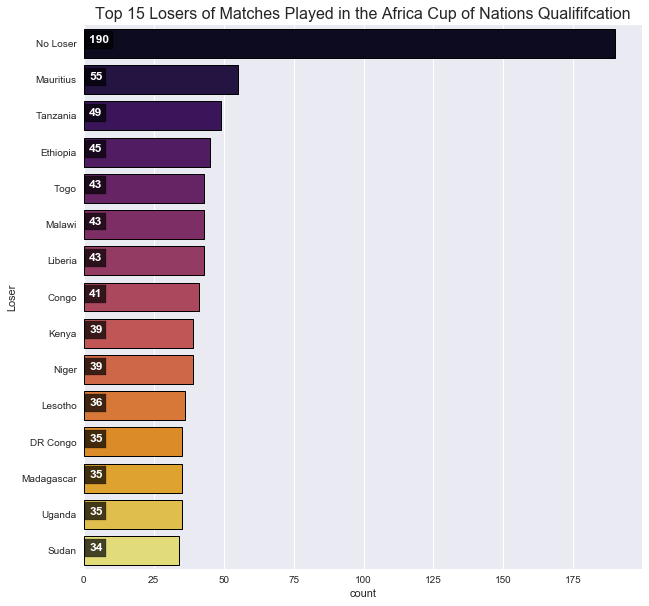

In [76]:
Plot_a_countplot(acnq,'Loser', 'Top 15 Losers of Matches Played in the Africa Cup of Nations Qualififcation')

In [77]:
acnq_goals = acnq.groupby('Year')['Total Goals'].sum().reset_index()

In [78]:
fig = px.line(acnq_goals,x='Year',y='Total Goals',
              title='Total Goals score in each year of the Africa Cup of Nations Qualification')
fig.show()

## An Analysis on matches played in the African Cup of Nations Tournament from 1957 to 2019

**acn = Africa Cup of Nations**

In [79]:
acn = df[df['Tournament']=='African Cup of Nations'].reset_index()

In [80]:
acn.head()

index       Date Home Team Away Team  Home Score  Away Score  \
0   4080 1957-02-10     Sudan     Egypt           1           2   
1   4081 1957-02-16     Egypt  Ethiopia           4           0   
2   4523 1959-05-22     Egypt  Ethiopia           4           0   
3   4526 1959-05-25  Ethiopia     Sudan           0           1   
4   4529 1959-05-29     Egypt     Sudan           2           1   

               Tournament      City               Country  Neutral  Year  \
0  African Cup of Nations  Khartoum                 Sudan    False  1957   
1  African Cup of Nations  Khartoum                 Sudan     True  1957   
2  African Cup of Nations     Cairo  United Arab Republic     True  1959   
3  African Cup of Nations     Cairo  United Arab Republic     True  1959   
4  African Cup of Nations     Cairo  United Arab Republic     True  1959   

  Month DayofWeek Outcome Winner     Loser  Total Goals  
0   Feb       Sun       A  Egypt     Sudan            3  
1   Feb       Sat       H  Egypt  Ethiopia            4  
2   May       Fri       H  Egypt  Ethiopia            4  
3   May       Mon       A  Sudan  Ethiopia            1  
4   May       Fri       H  Egypt     Sudan            3

In [81]:
# drop the index column
acn.drop('index',axis=1,inplace=True)

In [82]:
acn.head()

Date Home Team Away Team  Home Score  Away Score  \
0 1957-02-10     Sudan     Egypt           1           2   
1 1957-02-16     Egypt  Ethiopia           4           0   
2 1959-05-22     Egypt  Ethiopia           4           0   
3 1959-05-25  Ethiopia     Sudan           0           1   
4 1959-05-29     Egypt     Sudan           2           1   

               Tournament      City               Country  Neutral  Year  \
0  African Cup of Nations  Khartoum                 Sudan    False  1957   
1  African Cup of Nations  Khartoum                 Sudan     True  1957   
2  African Cup of Nations     Cairo  United Arab Republic     True  1959   
3  African Cup of Nations     Cairo  United Arab Republic     True  1959   
4  African Cup of Nations     Cairo  United Arab Republic     True  1959   

  Month DayofWeek Outcome Winner     Loser  Total Goals  
0   Feb       Sun       A  Egypt     Sudan            3  
1   Feb       Sat       H  Egypt  Ethiopia            4  
2   May       Fri       H  Egypt  Ethiopia            4  
3   May       Mon       A  Sudan  Ethiopia            1  
4   May       Fri       H  Egypt     Sudan            3

In [83]:
# creating a dataframe that shows the totalgoals scored in each tournament year
acn_goals = acn.groupby('Year')['Total Goals'].sum().reset_index()

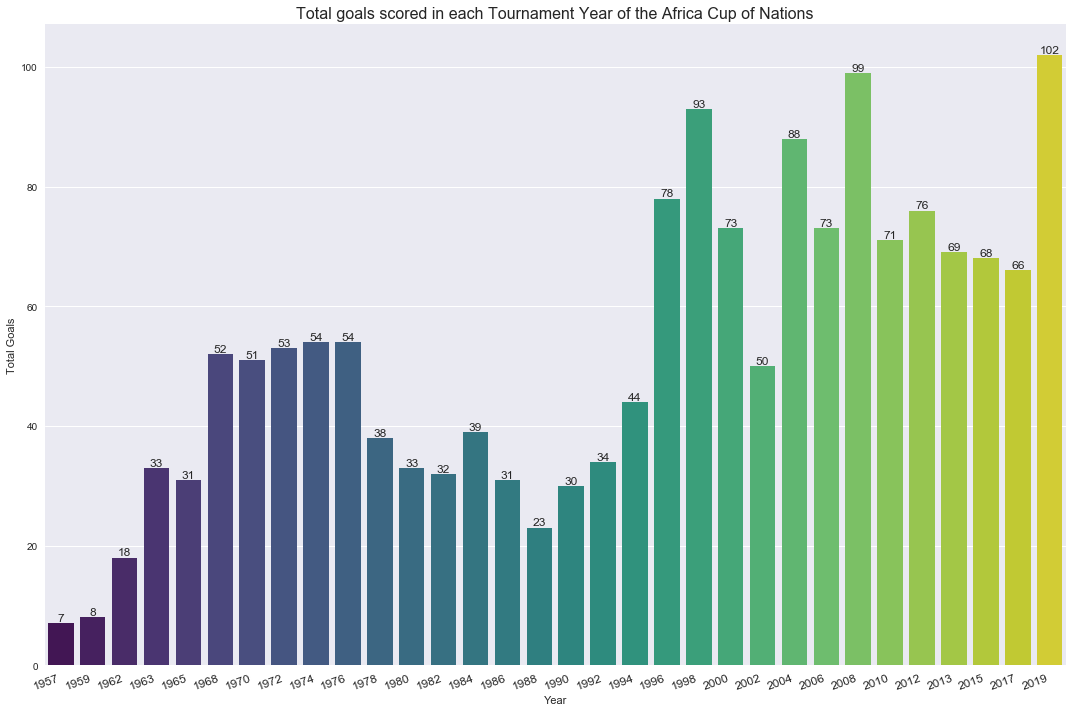

In [84]:
# plotting total goals scored in each tournament year
plt.figure(figsize=(15,10))
ax = sns.barplot(x=acn_goals['Year'],y=acn_goals['Total Goals'],palette='viridis')
ax.set_xticklabels(ax.get_xticklabels(),rotation=20,ha='right',fontsize=12)
for p in ax.patches:
      ax.annotate(int(p.get_height()),(p.get_x() + p.get_width()/2,p.get_height()),ha='center',
                  va ='bottom',fontsize=12)
plt.title('Total goals scored in each Tournament Year of the Africa Cup of Nations', fontsize=16)
plt.tight_layout()

In [85]:
acn['Country'].value_counts()

Egypt                   117
Ghana                    72
South Africa             61
Tunisia                  60
Equatorial Guinea        48
Gabon                    48
Ethiopia                 38
Mali                     32
Burkina Faso             32
Nigeria                  32
Angola                   29
Senegal                  20
Sudan                    18
Cameroon                 16
Morocco                  16
Algeria                  16
Ivory Coast              16
Libya                    16
United Arab Republic      3
Name: Country, dtype: int64

We know *United Arab Republic* is not an African Country. In the next few codes, the mistake would be corrected

In [86]:
acn[(acn['Country']== 'United Arab Republic')]

Date Home Team Away Team  Home Score  Away Score  \
2 1959-05-22     Egypt  Ethiopia           4           0   
3 1959-05-25  Ethiopia     Sudan           0           1   
4 1959-05-29     Egypt     Sudan           2           1   

               Tournament   City               Country  Neutral  Year Month  \
2  African Cup of Nations  Cairo  United Arab Republic     True  1959   May   
3  African Cup of Nations  Cairo  United Arab Republic     True  1959   May   
4  African Cup of Nations  Cairo  United Arab Republic     True  1959   May   

  DayofWeek Outcome Winner     Loser  Total Goals  
2       Fri       H  Egypt  Ethiopia            4  
3       Mon       A  Sudan  Ethiopia            1  
4       Fri       H  Egypt     Sudan            3

In [87]:
acn['Country'].replace('United Arab Republic','Egypt',inplace=True)

In [88]:
acn[(acn['City']=='Cairo') & (acn['Country']== 'Egypt')].head()

Date Home Team Away Team  Home Score  Away Score  \
2  1959-05-22     Egypt  Ethiopia           4           0   
3  1959-05-25  Ethiopia     Sudan           0           1   
4  1959-05-29     Egypt     Sudan           2           1   
73 1974-03-01     Egypt    Uganda           2           1   
77 1974-03-04     Egypt    Zambia           3           1   

                Tournament   City Country  Neutral  Year Month DayofWeek  \
2   African Cup of Nations  Cairo   Egypt     True  1959   May       Fri   
3   African Cup of Nations  Cairo   Egypt     True  1959   May       Mon   
4   African Cup of Nations  Cairo   Egypt     True  1959   May       Fri   
73  African Cup of Nations  Cairo   Egypt    False  1974   Mar       Fri   
77  African Cup of Nations  Cairo   Egypt    False  1974   Mar       Mon   

   Outcome Winner     Loser  Total Goals  
2        H  Egypt  Ethiopia            4  
3        A  Sudan  Ethiopia            1  
4        H  Egypt     Sudan            3  
73       H  Egypt    Uganda            3  
77       H  Egypt    Zambia            4

In [89]:
acn['Country'].unique()

array(['Sudan', 'Egypt', 'Ethiopia', 'Ghana', 'Tunisia', 'Cameroon',
       'Nigeria', 'Libya', 'Ivory Coast', 'Morocco', 'Algeria', 'Senegal',
       'South Africa', 'Burkina Faso', 'Mali', 'Angola',
       'Equatorial Guinea', 'Gabon'], dtype=object)

In [90]:
acn[acn['Country'] =='Egypt']['Year'].value_counts()

2019    52
2006    32
1974    17
1986    16
1959     3
Name: Year, dtype: int64

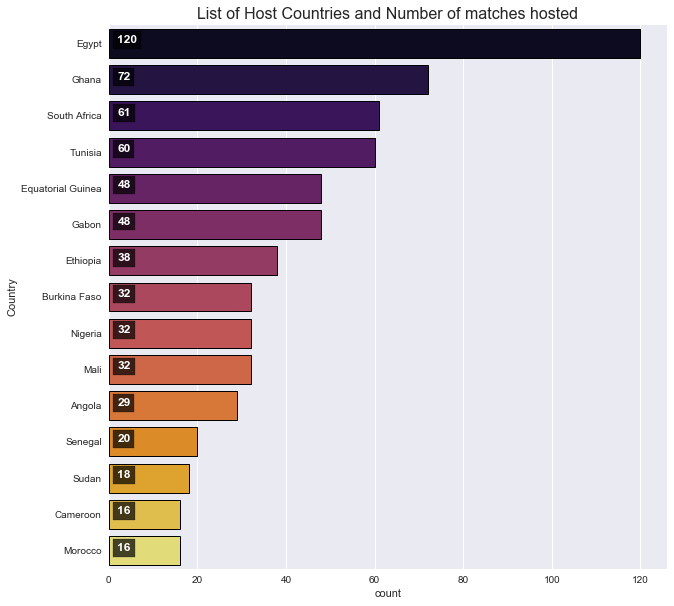

In [91]:
Plot_a_countplot(acn,'Country','List of Host Countries and Number of matches hosted')

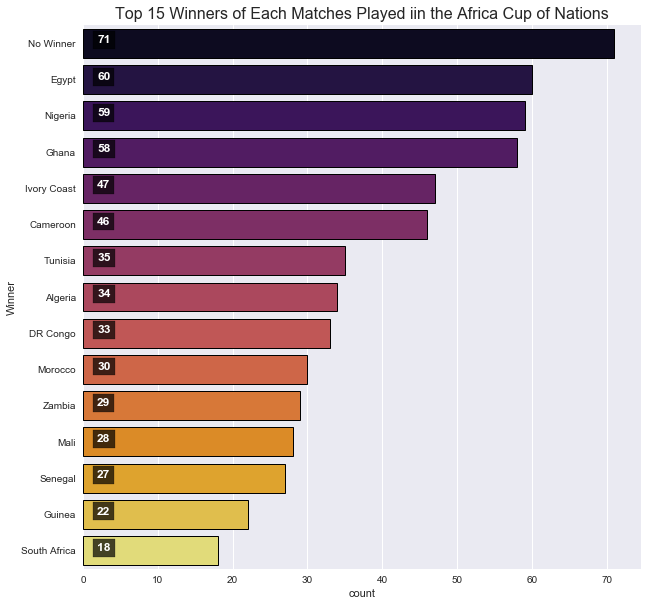

In [92]:
Plot_a_countplot(acn,'Winner','Top 15 Winners of Each Matches Played iin the Africa Cup of Nations')

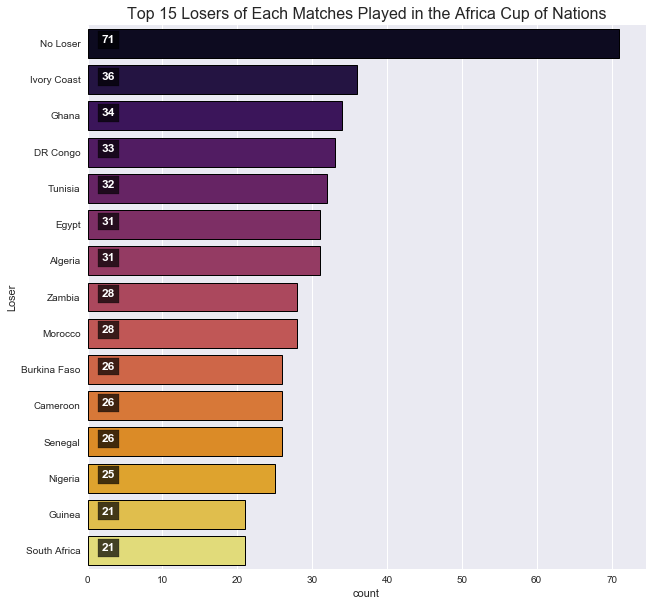

In [93]:
Plot_a_countplot(acn,'Loser','Top 15 Losers of Each Matches Played in the Africa Cup of Nations')

In [95]:
print('About 71 matches ended in a goaless draw since 1957 to 2019 across all stages of the African Nations Cup')

About 71 matches ended in a goaless draw since 1957 to 2019 across all stages of the African Nations Cup


### Adebo Dolapo